# Transfer Learning MNIST

* Train a simple convnet on the MNIST dataset the first 5 digits [0-4].
* Freeze convolutional layers and fine-tune dense layers for the classification of digits [5-9].

## MNIST Dataset
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

Let's import keras and load MNIST dataset

In [0]:
%tensorflow_version 2.x

In [158]:
import tensorflow
tensorflow.__version__

'2.1.0-rc1'

In [0]:
# Initialize the random number generator
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [0]:
from tensorflow.keras.backend import backend
from tensorflow.keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which number they actually are.

Let's visualize some numbers using matplotlib

Label: 0


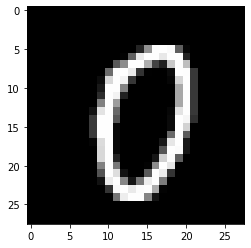

In [161]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[1000]))
plt.imshow(X_train[1000], cmap='gray')

## Question 1

### Create two datasets
- First having digits from 0 to 4
- Second having digits from 5 to 9

Hint: use labels to separate data

In [0]:
# shape of the train and test data

In [163]:
print ("x_train row count: ", len(X_train))
print ("y_train row count: ", len(y_train))
print ("x_test row count: ", len(X_test))
print ("y_test row count: ", len(y_test))

x_train row count:  60000
y_train row count:  60000
x_test row count:  10000
y_test row count:  10000


In [164]:
X_train.shape # each image is of size 28X28

(60000, 28, 28)

In [0]:
# creating the two required datasets

In [0]:
# firstly the train data

In [0]:
x_train0to4 = X_train[y_train<=4]
y_train0to4 = y_train[y_train<=4]
x_train5to9 = X_train[y_train>4]
y_train5to9 = y_train[y_train>4]

In [0]:
# secondly the test data

In [0]:
x_test0to4 = X_test[y_test<=4]
y_test0to4 = y_test[y_test<=4]
x_test5to9 = X_test[y_test>4]
y_test5to9 = y_test[y_test>4]

## Question 2

### Print shape of the data
- print shape of all variables of both the datasets you created

In [0]:
# printing shape of train data of the two new datasets

In [171]:
print ("x_train0to4 row count: ", len(x_train0to4))
print ("y_train0to4 row count: ", len(y_train0to4))
print ("x_train5to9 row count: ", len(x_train5to9))
print ("y_train5to9 row count: ", len(y_train5to9))

x_train0to4 row count:  30596
y_train0to4 row count:  30596
x_train5to9 row count:  29404
y_train5to9 row count:  29404


In [0]:
# printing shape of test data of the two new datasets

In [173]:
print ("x_test0to4 row count: ", len(x_test0to4))
print ("y_test0to4 row count: ", len(y_test0to4))
print ("x_test5to9 row count: ", len(x_test5to9))
print ("y_test5to9 row count: ", len(y_test5to9))

x_test0to4 row count:  5139
y_test0to4 row count:  5139
x_test5to9 row count:  4861
y_test5to9 row count:  4861


## Question 3

### Reshape data
- reshape first dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [0]:
# reshaping the new dataset ie the first dataset having labels 0 to 4

In [0]:
# for use in keras we have the four dimensions as 
# 1. len(x_train0to4) = 30596 which are the features having labels 0 to 4
# 2. and 3. 28X28 as it is the shape of the images of the by default train test split of mnist
# 4. channel = 1 grey scale image and hence adding 1

In [0]:
x_train0to4 = x_train0to4.reshape(len(x_train0to4),28,28,1)

In [0]:
x_test0to4 = x_test0to4.reshape(len(x_test0to4),28,28,1)

## Question 4

### Normalize data
- normalize first dataset
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [0]:
# normalize first dataset with labels 0 to 4

In [179]:
x_train0to4.dtype

dtype('uint8')

In [180]:
x_test0to4.dtype

dtype('uint8')

In [0]:
# as the datatype is uint8 , converting it to float 32

In [0]:
x_train0to4 = x_train0to4.astype('float32')
x_test0to4 = x_test0to4.astype('float32')

In [0]:
# normalizing by dividing by 255

In [0]:
x_train0to4 = x_train0to4/255
x_test0to4 = x_test0to4/255

### Print shape of data and number of images
- for first dataset
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [185]:
x_train0to4.shape #for first dataset printing shape of x_train

(30596, 28, 28, 1)

In [186]:
x_test0to4.shape #for first dataset printing shape of x_test

(5139, 28, 28, 1)

In [187]:
len(x_train0to4) # print number of images in x_train for first dataset

30596

In [188]:
len(x_test0to4) #print number of images in x_test for first dataset

5139

## Question 5

### One-hot encode the class vector
- encode labels of first dataset
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [0]:
y_train0to4 = tensorflow.keras.utils.to_categorical(y_train0to4, 5)
y_test0to4 = tensorflow.keras.utils.to_categorical(y_test0to4, 5)

## Question 6
We will build our model by using high level Keras.

### Initialize a sequential model
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.2

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [0]:
#defining a sequential model
model = Sequential()
#add 2 convolutional layers
#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1),name='conv_1'))

#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, (3, 3), activation='relu',name='conv_2'))

#Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2),name='max_layer1'))

#Apply Dropout with 0.25 probability 
model.add(Dropout(0.2,name='drop_1'))

## Question 7

### Add classification layers
- do this after doing question 6
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes
- you can add a dropout layer in between, if necessary

In [0]:
#Adding Flattening the layer
model.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model.add(Dense(128, activation='relu',name='dense_1'))

#Apply Dropout with 0.5 probability 
model.add(Dropout(0.5,name='drop_2'))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(5, activation='softmax',name='dense_3'))

## Question 8

### Compile and fit the model
- compile your model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "sgd"
- fit your model
    - give train data - features and labels
    - batch size: 128
    - epochs: 10
    - give validation data - features and labels

In [0]:
from tensorflow.keras.losses import categorical_crossentropy

In [0]:
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer="sgd",
              metrics=['accuracy'])

In [195]:
#Training on the dataset
model.fit(x_train0to4, y_train0to4,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(x_test0to4, y_test0to4))

Train on 30596 samples, validate on 5139 samples
Epoch 1/10
30596/30596 [==============================] - 2s 64us/sample - loss: 0.6548 - accuracy: 0.7968 - val_loss: 0.2031 - val_accuracy: 0.9350
Epoch 2/10
30596/30596 [==============================] - 2s 50us/sample - loss: 0.1993 - accuracy: 0.9389 - val_loss: 0.0929 - val_accuracy: 0.9712
Epoch 3/10
30596/30596 [==============================] - 2s 50us/sample - loss: 0.1584 - accuracy: 0.9514 - val_loss: 0.0740 - val_accuracy: 0.9786
Epoch 4/10
30596/30596 [==============================] - 2s 50us/sample - loss: 0.1394 - accuracy: 0.9572 - val_loss: 0.0658 - val_accuracy: 0.9803
Epoch 5/10
30596/30596 [==============================] - 1s 49us/sample - loss: 0.1246 - accuracy: 0.9619 - val_loss: 0.0575 - val_accuracy: 0.9819
Epoch 6/10
30596/30596 [==============================] - 2s 49us/sample - loss: 0.1176 - accuracy: 0.9639 - val_loss: 0.0536 - val_accuracy: 0.9850
Epoch 7/10
30596/30596 [==============================] -

## Question 9

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [0]:
import numpy as np

In [0]:
predictions_train = model.predict(x_train0to4)
predictions_test = model.predict(x_test0to4)

In [198]:
from sklearn import metrics
print ("Train Accuracy: ", metrics.accuracy_score(np.argmax(y_train0to4, axis=1), np.argmax(predictions_train, axis=1)))

Train Accuracy:  0.9812720617074128


In [199]:
from sklearn.metrics import classification_report

print ("Classification Report for train data")
print(classification_report(np.argmax(y_train0to4, axis=1), np.argmax(predictions_train, axis=1)))

Classification Report for train data
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5923
           1       0.99      0.98      0.99      6742
           2       0.98      0.97      0.97      5958
           3       0.98      0.97      0.98      6131
           4       0.97      0.99      0.98      5842

    accuracy                           0.98     30596
   macro avg       0.98      0.98      0.98     30596
weighted avg       0.98      0.98      0.98     30596



In [200]:
print ("Test Accuracy: ", metrics.accuracy_score(np.argmax(y_test0to4, axis=1), np.argmax(predictions_test, axis=1)))

Test Accuracy:  0.9859894921190894


In [201]:
print ("Classification Report for test data")
print(classification_report(np.argmax(y_test0to4, axis=1), np.argmax(predictions_test, axis=1)))

Classification Report for test data
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.98      0.97      0.97      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.99      0.99       982

    accuracy                           0.99      5139
   macro avg       0.99      0.99      0.99      5139
weighted avg       0.99      0.99      0.99      5139



## Question 10

## Transfer learning
Now we will apply this model on second dataset (5-9 digits)

- fix the first convolution layers so that the weights in the convolution layers dont get updated in the process of training
- get the second dataset
- train the last 2 dense layers
- predict the accuracy and loss

### Make only dense layers trainable
- set trainalble = False for all layers other than Dense layers

In [202]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in model.layers:
  if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in model.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))

conv_1
False
conv_2
False
max_layer1
False
drop_1
False
flatten_1
False
dense_1
True
drop_2
False
dense_3
True


In [203]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
model.save_weights("/content/drive/My Drive/Great Learning Residency 8.2 Statistical NLP/LAB 8/cnn_mnist_weights.h5")

### Reshape data
- reshape second dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [0]:
# reshaping the second data

In [0]:
x_train5to9 = x_train5to9.reshape(len(x_train5to9),28,28,1)
x_test5to9 = x_test5to9.reshape(len(x_test5to9),28,28,1)

### Normalize data
- normalize second data
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [207]:
x_train5to9.dtype

dtype('uint8')

In [208]:
x_test5to9.dtype

dtype('uint8')

In [0]:
# converting to float 32

In [0]:
x_train5to9 = x_train5to9.astype('float32')
x_test5to9 = x_test5to9.astype('float32')

In [211]:
x_train5to9.dtype

dtype('float32')

In [0]:
# normalizing

In [0]:
x_train5to9 = x_train5to9/255
x_test5to9 = x_test5to9/255

### Modify data
- in your second data, class labels will start from 5 to 9 but for keras.utils.to_categorical the labels should start from 0
- so you need to subtract 5 from train and test labels

In [0]:
#Converting the y_train and y_test to have values 0 to 4
y_train5to9 = y_train5to9 - 5
y_test5to9 = y_test5to9 - 5

### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [0]:
#Use One-hot encoding to divide y_train and y_test into required no of output classes

In [0]:
y_train5to9 = tensorflow.keras.utils.to_categorical(y_train5to9, 5)
y_test5to9 = tensorflow.keras.utils.to_categorical(y_test5to9, 5)

### Print shape of data and number of images
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [217]:
x_train5to9.shape #for first dataset printing shape of x_train

(29404, 28, 28, 1)

In [218]:
x_test5to9.shape #for first dataset printing shape of x_train

(4861, 28, 28, 1)

In [219]:
len(x_train5to9) # print number of images in x_train for first dataset

29404

In [220]:
len(x_train5to9) # print number of images in x_train for first dataset

29404

### Fit the model
- give train data - features and labels
- batch size: 128
- epochs: 10
- give validation data - features and labels

In [0]:
#The pre-trained weights must exist in the current folder
model.load_weights('/content/drive/My Drive/Great Learning Residency 8.2 Statistical NLP/LAB 8/cnn_mnist_weights.h5')

In [0]:
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer="sgd",
              metrics=['accuracy'])

In [223]:
#Training on the dataset
model.fit(x_train5to9, y_train5to9,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(x_test5to9, y_test5to9))

Train on 29404 samples, validate on 4861 samples
Epoch 1/10
29404/29404 [==============================] - 2s 56us/sample - loss: 0.5629 - accuracy: 0.8121 - val_loss: 0.2189 - val_accuracy: 0.9342
Epoch 2/10
29404/29404 [==============================] - 1s 40us/sample - loss: 0.3148 - accuracy: 0.8999 - val_loss: 0.1693 - val_accuracy: 0.9469
Epoch 3/10
29404/29404 [==============================] - 1s 40us/sample - loss: 0.2588 - accuracy: 0.9170 - val_loss: 0.1466 - val_accuracy: 0.9552
Epoch 4/10
29404/29404 [==============================] - 1s 42us/sample - loss: 0.2301 - accuracy: 0.9251 - val_loss: 0.1297 - val_accuracy: 0.9593
Epoch 5/10
29404/29404 [==============================] - 1s 40us/sample - loss: 0.2159 - accuracy: 0.9302 - val_loss: 0.1218 - val_accuracy: 0.9611
Epoch 6/10
29404/29404 [==============================] - 1s 40us/sample - loss: 0.2053 - accuracy: 0.9353 - val_loss: 0.1161 - val_accuracy: 0.9621
Epoch 7/10
29404/29404 [==============================] -

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [0]:
predictions_train5to9 = model.predict(x_train5to9)
predictions_test5to9 = model.predict(x_test5to9)

In [225]:
print ("Train Accuracy: ", metrics.accuracy_score(np.argmax(y_train5to9, axis=1), np.argmax(predictions_train5to9, axis=1)))

Train Accuracy:  0.9713984491905863


In [226]:
print ("Classification Report for train data")
print(classification_report(np.argmax(y_train5to9, axis=1), np.argmax(predictions_train5to9, axis=1)))

Classification Report for train data
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      5421
           1       0.97      0.99      0.98      5918
           2       0.98      0.98      0.98      6265
           3       0.97      0.97      0.97      5851
           4       0.97      0.96      0.96      5949

    accuracy                           0.97     29404
   macro avg       0.97      0.97      0.97     29404
weighted avg       0.97      0.97      0.97     29404



In [227]:
print ("Test Accuracy: ", metrics.accuracy_score(np.argmax(y_test5to9, axis=1), np.argmax(predictions_test5to9, axis=1)))

Test Accuracy:  0.9679078378934376


In [228]:
print ("Classification Report for test data")
print(classification_report(np.argmax(y_test5to9, axis=1), np.argmax(predictions_test5to9, axis=1)))

Classification Report for test data
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       892
           1       0.98      0.98      0.98       958
           2       0.98      0.97      0.98      1028
           3       0.96      0.96      0.96       974
           4       0.97      0.96      0.97      1009

    accuracy                           0.97      4861
   macro avg       0.97      0.97      0.97      4861
weighted avg       0.97      0.97      0.97      4861



-----------------------------------------------------------------------------

# Sentiment analysis 

The objective of the second problem is to perform Sentiment analysis from the tweets collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

## Question 1

### Read the data
- read tweets.csv
- use latin encoding if it gives encoding error while loading

In [0]:
import pandas as pd

In [0]:
dfTweets = pd.read_csv('/content/drive/My Drive/Great Learning Residency 8.2 Statistical NLP/LAB 8/tweets.csv', encoding = 'latin')

In [231]:
dfTweets.shape

(9093, 3)

### Drop null values
- drop all the rows with null values

In [232]:
print("Count of Rows before NA drop: ", dfTweets.shape)

Count of Rows before NA drop:  (9093, 3)


In [0]:
dfTweets.dropna(inplace = True)

In [234]:
print("Count of Rows after NA drop: ", dfTweets.shape)

Count of Rows after NA drop:  (3291, 3)


### Print the dataframe
- print initial 5 rows of the data
- use df.head()

In [235]:
dfTweets.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## Question 2

### Preprocess data
- convert all text to lowercase - use .lower()
- select only numbers, alphabets, and #+_ from text - use re.sub()
- strip all the text - use .strip()
    - this is for removing extra spaces

In [0]:
#convert all text to lowercase - use .lower()

In [0]:
dfTweets=dfTweets.applymap(lambda s : s.lower())

In [0]:
#select only numbers, alphabets, and #+_ from text - use re.sub()

In [0]:
import re

In [0]:
dfTweets=dfTweets.applymap(lambda s : re.sub ("[^0-9a-z #+_]"," ",s))

In [0]:
dfTweets=dfTweets.applymap(lambda s : s.strip())

print dataframe

In [242]:
dfTweets

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweet...,iphone,negative emotion
1,jessedee know about fludapp awesome ipad ip...,ipad or iphone app,positive emotion
2,swonderlin can not wait for #ipad 2 also they...,ipad,positive emotion
3,sxsw i hope this year s festival isn t as cras...,ipad or iphone app,negative emotion
4,sxtxstate great stuff on fri #sxsw marissa ma...,google,positive emotion
...,...,...,...
9077,mention your pr guy just convinced me to switc...,iphone,positive emotion
9079,quot papyrus sort of like the ipad quot n...,ipad,positive emotion
9080,diller says google tv quot might be run over ...,other google product or service,negative emotion
9085,i ve always used camera+ for my iphone b c it ...,ipad or iphone app,positive emotion


## Question 3

### Preprocess data
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - select only those rows where value equal to "positive emotion" or "negative emotion"
- find the value counts of "positive emotion" and "negative emotion"

In [243]:
dfTweets['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

positive emotion                      2672
negative emotion                       519
no emotion toward brand or product      91
i can t tell                             9
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [0]:
dfTweets = dfTweets.loc[dfTweets['is_there_an_emotion_directed_at_a_brand_or_product'].isin(['negative emotion', 'positive emotion'])]

In [245]:
dfTweets['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

positive emotion    2672
negative emotion     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [246]:
dfTweets.shape

(3191, 3)

In [247]:
dfTweets.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweet...,iphone,negative emotion
1,jessedee know about fludapp awesome ipad ip...,ipad or iphone app,positive emotion
2,swonderlin can not wait for #ipad 2 also they...,ipad,positive emotion
3,sxsw i hope this year s festival isn t as cras...,ipad or iphone app,negative emotion
4,sxtxstate great stuff on fri #sxsw marissa ma...,google,positive emotion


## Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [0]:
new_values = {'positive emotion': 1, 'negative emotion': 0}

In [0]:
dfTweets.is_there_an_emotion_directed_at_a_brand_or_product = dfTweets.is_there_an_emotion_directed_at_a_brand_or_product.map(new_values)

In [250]:
dfTweets

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweet...,iphone,0
1,jessedee know about fludapp awesome ipad ip...,ipad or iphone app,1
2,swonderlin can not wait for #ipad 2 also they...,ipad,1
3,sxsw i hope this year s festival isn t as cras...,ipad or iphone app,0
4,sxtxstate great stuff on fri #sxsw marissa ma...,google,1
...,...,...,...
9077,mention your pr guy just convinced me to switc...,iphone,1
9079,quot papyrus sort of like the ipad quot n...,ipad,1
9080,diller says google tv quot might be run over ...,other google product or service,0
9085,i ve always used camera+ for my iphone b c it ...,ipad or iphone app,1


## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [0]:
feature= dfTweets['tweet_text']
label = dfTweets['is_there_an_emotion_directed_at_a_brand_or_product']

### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [0]:
import sklearn.model_selection as sk

X_train, X_test, y_train, y_test = sk.train_test_split(feature,label,test_size=0.25, random_state = 42)

## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [0]:
# use CountVectorizer to create document-term matrices
vect = CountVectorizer(stop_words='english',ngram_range=(1, 2), min_df=2)

In [0]:
#use CountVectorizer to create document-term matrices

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [259]:
X_train_dtm

<2393x5336 sparse matrix of type '<class 'numpy.int64'>'
	with 38406 stored elements in Compressed Sparse Row format>

In [262]:
X_test_dtm

<798x5336 sparse matrix of type '<class 'numpy.int64'>'
	with 10917 stored elements in Compressed Sparse Row format>

In [0]:
# Document term matrix 

In [266]:
dtm_x_train = pd.DataFrame(X_train_dtm.toarray(), columns=vect.get_feature_names())
print(dtm_x_train.head())

   000  10  10 attendees  100  ...  zombies  zomg  zomg mention  zoom
0    0   0             0    0  ...        0     0             0     0
1    0   0             0    0  ...        0     0             0     0
2    0   0             0    0  ...        0     0             0     0
3    0   0             0    0  ...        0     0             0     0
4    0   0             0    0  ...        0     0             0     0

[5 rows x 5336 columns]


In [267]:
dtm_x_test = pd.DataFrame(X_test_dtm.toarray(), columns=vect.get_feature_names())
print(dtm_x_test.head())

   000  10  10 attendees  100  ...  zombies  zomg  zomg mention  zoom
0    0   0             0    0  ...        0     0             0     0
1    0   0             0    0  ...        0     0             0     0
2    0   0             0    0  ...        0     0             0     0
3    0   0             0    0  ...        0     0             0     0
4    0   0             0    0  ...        0     0             0     0

[5 rows x 5336 columns]


## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
log_reg = LogisticRegression()

### Fit the classifer
- fit logistic regression classifier

In [281]:
logreg.fit(X_train_dtm, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [0]:
from sklearn.naive_bayes import MultinomialNB

In [0]:
nb = MultinomialNB()

### Fit the classifer
- fit naive bayes classifier

In [284]:
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [0]:
y_pred_testLR = logreg.predict(X_test_dtm)

### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [0]:
y_pred_testNB = nb.predict(X_test_dtm)

## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [287]:
print (metrics.accuracy_score(y_test, y_pred_testLR))

0.8621553884711779


### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [288]:
metrics.accuracy_score(y_test, y_pred_testNB)

0.8508771929824561